In [2]:
import networkx as nx
import pandas as pd

from numpy.random import randint
from scipy.io import loadmat
from ucimlrepo import fetch_ucirepo 
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# HW1

## Q1

Consider the wheel graph on 7 vertices below. Assume each triangle is equilateral, or use [the graph distance](https://mathworld.wolfram.com/GraphDistance.html).

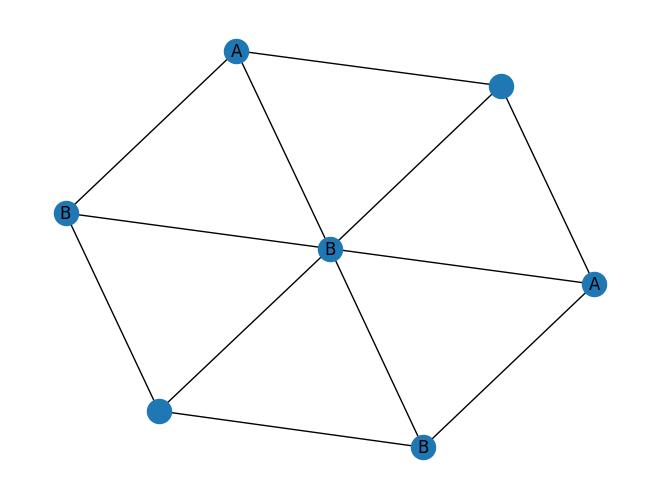

In [2]:
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw(G,pos)
labels = {x: y for x,y in enumerate(['B','A','B','','B','A',''])}
res = nx.draw_networkx_labels(G,pos,labels)

1. Apply the k-NN algorithm by hand with $k=1$ to fill-in the missing labels. You must explain why you gave the specific label.
   
2. This time apply the k-NN by hand again with $k=3$ to fill-in the missing labels. Again, you must explain why you gave the specific label.

3. Apply k-means algorithm by hand with k=2. Use the unlabeled points as the initial centroids.

4. What happens with the central vertex? What are the centroids after the first run? Notice that if we randomly assign the central vertex, it affects the subsequent iterations.

5. Verify that iterations stabilize after first run.

6. What happens if we change the initial centroids? Explain.

   Assuming each triangle is equilateral.
1. Applying k-NN algoritm with $k=1$ to this specific graph, we will look the 1 closest label to our missing ones.
   4th node(bottom missing label) must be B since closest label (which could be one of the 3 neighbour of B) to it    is B. 
   7th label might change every run and can be either A or B, because closest label to that node are both neighbour    A and B so it randomizes.
   
2. Applying k-NN algoritm with $k=3$ to this specific graph. we will look 3 closest labels to each missing ones and determine which label is majority.
   4th node must be B because 3 closest labels to that node are all B. 
   7th node must be A because 3 closest labels to that node are A,B and A so A's are majority.

3. Applying k-means algorithm with $k=2$. We will have 2 clusters labeled as for example X and Y. Unlabeled nodes will be assigned to the nearest cluster points X or Y. Since central vertex is equally distant from X and Y, it will be randomly assigned to X or Y if there is no other criterion.


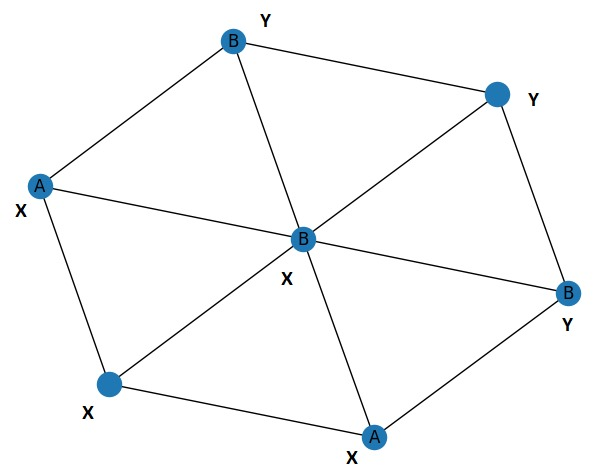

4. Central vertex is equally distant from X and Y, so it will be randomly assigned to cluster X or Y if there is no other criterion.
 If we assume central vertex is assigned to cluster X:
 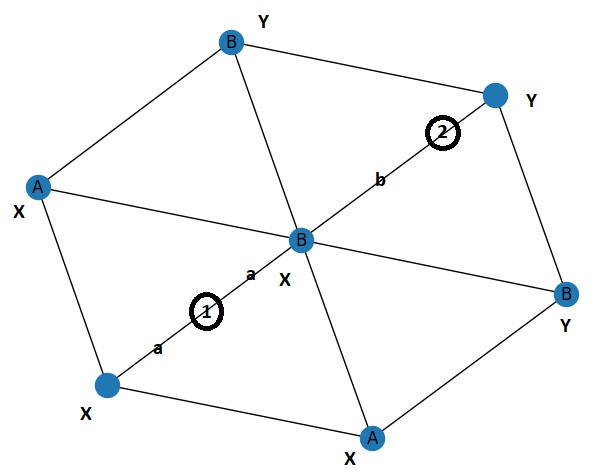
 
 Our new centroids become 1 and 2. 

5. Notice that a<b. So, like the previous cluster, the central vertex will be assigned to cluster 1 again and also cluster 2 will remain same. We can say that clusters 1 and 2 are stabilized as shown.

6. If we change our initial centroids, all 2 clusters will be shaped according to the 2 initial centroids. Naturally we would get a different clusters.

## Q2

Consider the dataset:

In [3]:
image = loadmat('../desktop/PaviaU.mat')['paviaU']
gt = loadmat('../desktop/PaviaU_gt.mat')['paviaU_gt']

The dataset is a hyperspectral image collected by the ROSIS sensor over Pavia, nothern Italy. The image is 610 x 340 pixels, and the number of spectral bands is 103, but some of the samples in the images contain no information and have to be discarded before the analysis. Image groundtruth differentiates 9 classes.

* asphalt (1)
* meadows (2)
* gravel (3)
* trees (4)
* painted metal (5)
* soil (6)
* bitumen (7)
* bricks (8)
* shadows (9)

In [4]:
image.shape
gt.shape

(610, 340, 103)

(610, 340)

Notice that each pixel $(i,j)$ contains a 103-dimensional vector $p_{i,j}$.

In [5]:
i = randint(610)
j = randint(340)
image[i,j]

array([ 722,  849,  850,  743,  711,  663,  631,  664,  694,  715,  712,
        715,  738,  721,  729,  746,  748,  783,  817,  851,  871,  878,
        870,  894,  937,  983, 1010, 1019, 1029, 1056, 1077, 1061, 1053,
       1066, 1079, 1080, 1077, 1089, 1070, 1046, 1049, 1051, 1065, 1078,
       1074, 1067, 1055, 1047, 1052, 1060, 1067, 1062, 1059, 1059, 1054,
       1045, 1044, 1037, 1035, 1050, 1062, 1064, 1065, 1073, 1092, 1126,
       1198, 1283, 1366, 1461, 1567, 1672, 1746, 1817, 1925, 2036, 2141,
       2223, 2260, 2295, 2326, 2388, 2424, 2330, 2273, 2310, 2361, 2384,
       2385, 2421, 2473, 2486, 2460, 2439, 2446, 2443, 2425, 2424, 2422,
       2375, 2341, 2365, 2413], dtype=uint16)

We are going to write k-NN models to associate a class label 1 to 9 as above to the pixel in the image, and measure the accuracy of the model.

1. Split the dataset into train and test. Use 90% of the data for training, and the remaining 10% for test. We are going to use *accuracy* which is calculated the ration of the number of correctly labelled points by the total number of pixels.

2. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance
$ d((i,j),(i',j')) = max(|i-i'|,|j-j'|) $. Decide which $k$ yields the best result.

3. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance $d((i,j),(i',j')) = \| p_{i,j} - p_{i',j'} \|$ where $\|\cdot\|$ denotes the Euclidean norm of a vector. Decide which $k$ yields the best results.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

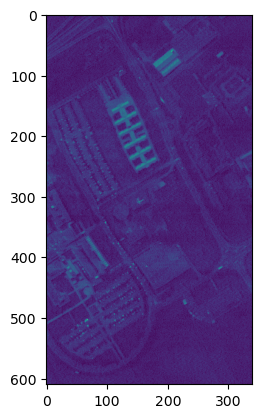

In [8]:
imgplot = plt.imshow(image[:,:,0])


In [10]:
image_flatten = image.reshape(-1, image.shape[2])
gt_flatten = gt.flatten()


In [12]:
model= KNN(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(image_flatten,gt_flatten,test_size=0.10)

results = {}
for k in [1,3,5,7,9]:
    
    model = KNN(n_neighbors=k,metric='euclidean') 
    
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_test)
    
    results[k] = accuracy_score(y_test, y_predict)
    
for k,acc in results.items():
    print(f'k={k}: Accuracy={acc}')

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

k=1: Accuracy=0.7953712632594021
k=3: Accuracy=0.8310028929604629
k=5: Accuracy=0.8352459016393443
k=7: Accuracy=0.8412246865959498
k=9: Accuracy=0.8426711668273867


Best k for Euclidean Distance: $k=9$

In [13]:
results = {}
for k in [1,3,5,7,9]:
    model = KNN(n_neighbors=k, metric='chebyshev')
    
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_test)
    
    results[k] = accuracy_score(y_test, y_predict)
    
for k, acc in results.items():
    print(f"k={k}: Accuracy={acc}")

KNeighborsClassifier(metric='chebyshev', n_neighbors=1)

KNeighborsClassifier(metric='chebyshev', n_neighbors=3)

KNeighborsClassifier(metric='chebyshev')

KNeighborsClassifier(metric='chebyshev', n_neighbors=7)

KNeighborsClassifier(metric='chebyshev', n_neighbors=9)

k=1: Accuracy=0.7660559305689489
k=3: Accuracy=0.8011571841851495
k=5: Accuracy=0.8103664416586307
k=7: Accuracy=0.8145612343297975
k=9: Accuracy=0.8179845708775313


Best k for Chebyshev Distance: $k=9$

## Q3

Consider [Individual household electric power consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) dataset from the UCI data repository:

In [19]:
import numpy as np

In [20]:
electric = fetch_ucirepo(id=235) 

/Users/bora/anaconda3/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [21]:
X = electric['data']['features'].iloc[:,2:]
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


1. Clean the data. You may replace the missing values with 0.
2. Apply k-means algorithm to the data with $k=2,3,4,5$.
3. Project the data to the 2-dimensional plane using Linear Discriminant Analysis as I did in the class, with the labels you obtained in step 2 above.
4. Inspect the data with the labels you constructed in step 2. Do these clusters have a visible meaning? Analyze.

In [23]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')

X_clean = X_numeric.fillna(0)
X_clean

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [24]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt

# k=2

In [15]:
k=2                                             #For k=2, I get an error trying to project the data to the 2-dimensional plane
model= KMeans(n_clusters=k, n_init='auto')      
model.fit(X_clean)
labels = model.fit_predict(X_clean)
    
projection = LDA(n_components=2)
res = projection.fit_transform(X_clean, labels)
    
plt.figure(figsize=(8,8))
plt.scatter(res[:,0],res[:,1],c=labels,alpha=0.2)

KMeans(n_clusters=2, n_init='auto')

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

# k=3,4,5

KMeans(n_clusters=3, n_init='auto')

<Figure size 800x800 with 0 Axes>

KMeans(n_clusters=4, n_init='auto')

<Figure size 800x800 with 0 Axes>

KMeans(n_clusters=5, n_init='auto')

<Figure size 800x800 with 0 Axes>

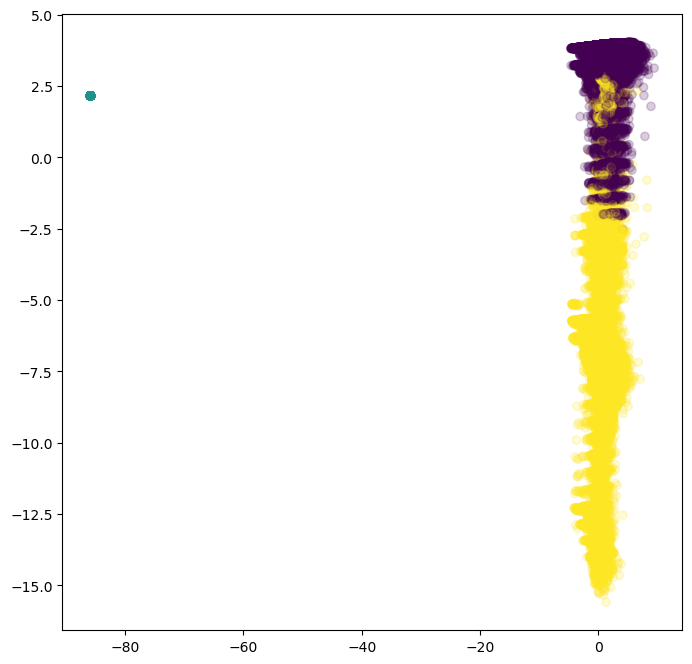

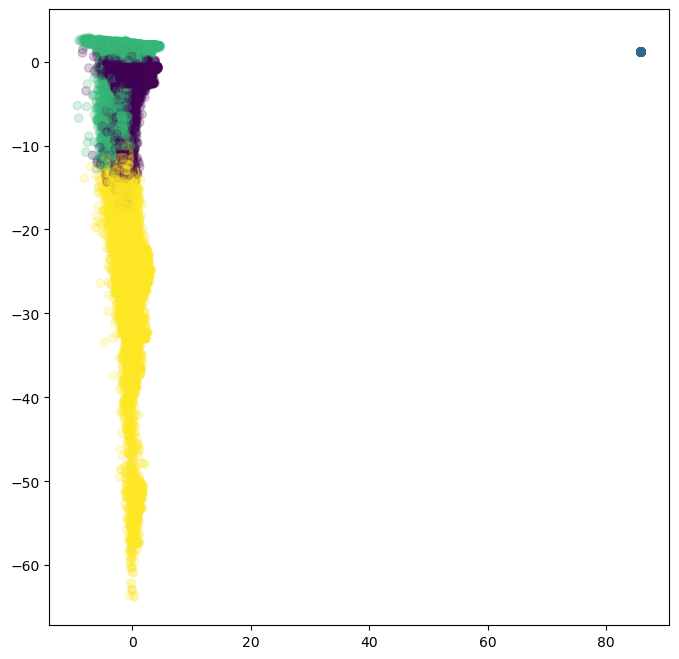

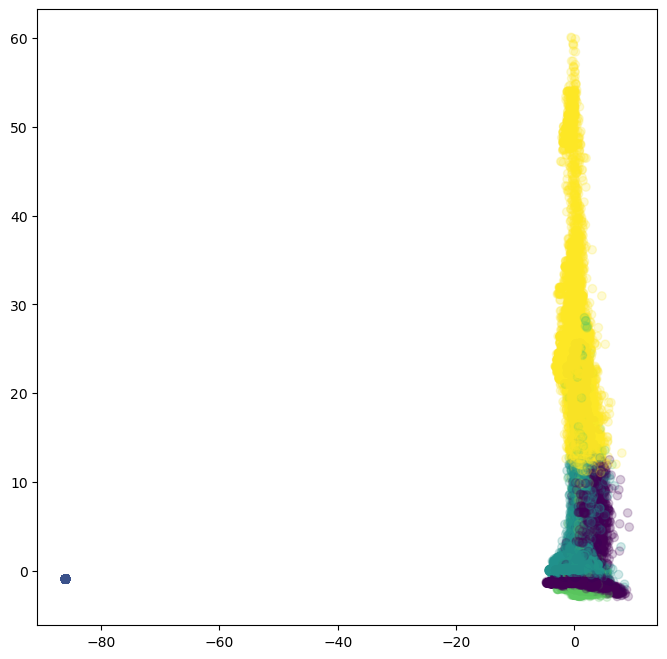

In [25]:
k_values = [3, 4, 5]

for k in k_values:
    model= KMeans(n_clusters=k, n_init='auto')
    model.fit(X_clean)
    labels = model.fit_predict(X_clean)
    
    projection = LDA(n_components=2)
    res = projection.fit_transform(X_clean, labels)
    
    plt.figure(figsize=(8,8))
    plt.scatter(res[:,0],res[:,1],c=labels,alpha=0.2)